In [10]:
gmdf = pd.read_csv('gWeekdayTotalTrafficPair.csv')
gmdf.head()

,출발주소,도착주소,총통행량
0,강원도,거창군,7.00
1,강원도,고성군,1.00
2,강원도,김해시,107.50
3,강원도,밀양시,31.75
4,강원도,사천시,13.50


In [11]:
dropIdx = gmdf[gmdf['출발주소']==gmdf['도착주소']].index
gmdf = gmdf.drop(dropIdx)

In [12]:
# network towards other provinces
# it must be strongly connected to Busan..
# make a copy of the dataframe gmdf and drop internal traffic
odf = gmdf.copy()
odf = odf[(odf['출발주소']=='강원도')|(odf['출발주소']=='경기도')|(odf['출발주소']=='경상북도')|
                (odf['출발주소']=='광주광역시')|(odf['출발주소']=='대구광역시')|(odf['출발주소']=='대전광역시')|(odf['출발주소']=='부산광역시')|
                (odf['출발주소']=='세종특별자치시')|(odf['출발주소']=='울산광역시')|(odf['출발주소']=='전라남도')|(odf['출발주소']=='전라북도')|
                (odf['출발주소']=='충청남도')|(odf['출발주소']=='충청북도')|
                (odf['도착주소']=='강원도')|(odf['도착주소']=='경기도')|(odf['도착주소']=='경상북도')|
                (odf['도착주소']=='광주광역시')|(odf['도착주소']=='대구광역시')|(odf['도착주소']=='대전광역시')|(odf['도착주소']=='부산광역시')|
                (odf['도착주소']=='세종특별자치시')|(odf['도착주소']=='울산광역시')|(odf['도착주소']=='전라남도')|(odf['도착주소']=='전라북도')|
                (odf['도착주소']=='충청남도')|(odf['도착주소']=='충청북도')]
odf

,출발주소,도착주소,총통행량
0,강원도,거창군,7.00
1,강원도,고성군,1.00
2,강원도,김해시,107.50
3,강원도,밀양시,31.75
4,강원도,사천시,13.50
...,...,...,...
615,합천군,울산광역시,11.25
617,합천군,전라남도,12.00
618,합천군,전라북도,24.75
622,합천군,충청남도,2.75


In [13]:
nList = np.concatenate((odf['출발주소'].values, odf['도착주소'].values), axis=None)
nList = np.unique(nList)
nList

array(['강원도', '거창군', '경기도', '경상북도', '고령군', '고성군', '광주광역시', '김해시', '대구광역시',
       '대전광역시', '밀양시', '부산광역시', '사천시', '산청군', '세종특별자치시', '양산시', '울산광역시',
       '전라남도', '전라북도', '진주시', '창녕군', '창원시', '충청남도', '충청북도', '통영시', '하동군',
       '함안군', '함양군', '합천군'], dtype=object)

In [15]:
# create an empty matrix to fill up
adjMatrix = pd.DataFrame(np.zeros((len(nList),len(nList))), columns=nList, index=nList)
adjMatrix.head()

,강원도,거창군,경기도,경상북도,고령군,고성군,광주광역시,김해시,대구광역시,대전광역시,...,진주시,창녕군,창원시,충청남도,충청북도,통영시,하동군,함안군,함양군,합천군
강원도,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
거창군,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
경기도,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
경상북도,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
고령군,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# while iterating over the rows, fill up the elements
for index, row in odf.iterrows():
    adjMatrix[row['출발주소']][row['도착주소']] += row['총통행량']
adjMatrix.head()

C:\Users\syj43\AppData\Local\Temp\ipykernel_20328\261834524.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adjMatrix[row['출발주소']][row['도착주소']] += row['총통행량']


,강원도,거창군,경기도,경상북도,고령군,고성군,광주광역시,김해시,대구광역시,대전광역시,...,진주시,창녕군,창원시,충청남도,충청북도,통영시,하동군,함안군,함양군,합천군
강원도,0.0,11.25,0.00,0.0,0.0,0.5,0.00,22.50,0.0,0.00,...,23.00,17.25,21.75,0.0,0.00,11.25,6.00,96.00,7.5,2.75
거창군,7.0,0.00,80.75,947.5,0.0,0.0,116.75,0.00,2063.0,25.75,...,0.00,0.00,0.00,32.5,32.75,0.00,0.00,0.00,0.0,0.00
경기도,0.0,91.50,0.00,0.0,0.0,115.0,0.00,1183.75,0.0,0.00,...,669.50,518.25,360.00,0.0,0.00,616.00,50.00,1686.25,343.5,18.75
경상북도,0.0,811193.00,0.00,0.0,11817.0,6.5,0.00,5161.75,0.0,0.00,...,195.25,724032.25,682.00,0.0,0.00,26.75,168.75,1730.75,152.0,187710.75
고령군,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00


In [18]:
# add the lower triangle to the upper one
for i in range(len(nList)): #row
    for j in range(i+1,len(nList)): #col
        adjMatrix.iloc[i][j] += adjMatrix.iloc[j][i]
adjMatrix

C:\Users\syj43\AppData\Local\Temp\ipykernel_20328\3498381457.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  adjMatrix.iloc[i][j] += adjMatrix.iloc[j][i]
C:\Users\syj43\AppData\Local\Temp\ipykernel_20328\3498381457.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the ass

,강원도,거창군,경기도,경상북도,고령군,고성군,광주광역시,김해시,대구광역시,대전광역시,...,진주시,창녕군,창원시,충청남도,충청북도,통영시,하동군,함안군,함양군,합천군
강원도,0.00,18.25,0.00,0.00,0.0,1.50,0.00,130.00,0.00,0.00,...,39.25,38.00,31.25,0.00,0.00,19.25,8.75,190.25,11.50,4.25
거창군,7.00,0.00,172.25,812140.50,0.0,0.00,233.75,0.00,4042.00,51.75,...,0.00,0.00,0.00,65.50,64.75,0.00,0.00,0.00,0.00,0.00
경기도,0.00,91.50,0.00,0.00,0.0,227.25,0.00,3942.25,0.00,0.00,...,1287.25,947.50,559.25,0.00,0.00,1210.75,99.50,3313.00,667.00,30.00
경상북도,0.00,811193.00,0.00,0.00,11817.0,11.75,0.00,12899.25,0.00,0.00,...,390.00,724874.50,1189.25,0.00,0.00,42.75,310.50,3605.50,311.75,188473.50
고령군,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
고성군,1.00,0.00,112.25,5.25,0.0,0.00,37.00,0.00,18.00,82.50,...,0.00,0.00,0.00,94.50,46.75,0.00,0.00,0.00,0.00,0.00
광주광역시,0.00,117.00,0.00,0.00,0.0,18.50,0.00,690.00,0.00,0.00,...,445.25,31.75,112.50,0.00,0.00,188.25,173.50,814.25,251.75,21.50
김해시,107.50,0.00,2758.50,7737.50,0.0,0.00,308.75,0.00,16658.25,948.25,...,0.00,0.00,0.00,1427.75,1486.50,0.00,0.00,0.00,0.00,0.00
대구광역시,0.00,1979.00,0.00,0.00,0.0,8.00,0.00,9644.00,0.00,0.00,...,510.50,1072719.25,613.75,0.00,0.00,77.00,230.75,5471.50,468.00,2052.00
대전광역시,0.00,26.00,0.00,0.00,0.0,39.00,0.00,165.75,0.00,0.00,...,589.75,147.00,112.00,0.00,0.00,413.75,77.25,644.25,360.50,4.00


In [19]:
# clear dialonal elements and those in the lower triangle
for i in range(len(nList)):
    for j in range(i):
        adjMatrix.iloc[i][j] = 0
adjMatrix.head()

C:\Users\syj43\AppData\Local\Temp\ipykernel_20328\3398866260.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adjMatrix.iloc[i][j] = 0
C:\Users\syj43\AppData\Local\Temp\ipykernel_20328\3398866260.py:4: FutureWarning: Series.__setitem__ tr

,강원도,거창군,경기도,경상북도,고령군,고성군,광주광역시,김해시,대구광역시,대전광역시,...,진주시,창녕군,창원시,충청남도,충청북도,통영시,하동군,함안군,함양군,합천군
강원도,0.0,18.25,0.00,0.0,0.0,1.50,0.00,130.00,0.0,0.00,...,39.25,38.0,31.25,0.0,0.00,19.25,8.75,190.25,11.50,4.25
거창군,0.0,0.00,172.25,812140.5,0.0,0.00,233.75,0.00,4042.0,51.75,...,0.00,0.0,0.00,65.5,64.75,0.00,0.00,0.00,0.00,0.00
경기도,0.0,0.00,0.00,0.0,0.0,227.25,0.00,3942.25,0.0,0.00,...,1287.25,947.5,559.25,0.0,0.00,1210.75,99.50,3313.00,667.00,30.00
경상북도,0.0,0.00,0.00,0.0,11817.0,11.75,0.00,12899.25,0.0,0.00,...,390.00,724874.5,1189.25,0.0,0.00,42.75,310.50,3605.50,311.75,188473.50
고령군,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,...,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00


In [20]:
# store values in the upper triangle for edge color
edgeColorList = []
for i in range(len(nList)):
    for j in range(i+1,len(nList)):
        if adjMatrix.iloc[i][j]<0.1:
            continue
        else:
            edgeColorList.append(int(adjMatrix.iloc[i][j]))
edgeColorList[:10]

C:\Users\syj43\AppData\Local\Temp\ipykernel_20328\1969088070.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if adjMatrix.iloc[i][j]<0.1:
C:\Users\syj43\AppData\Local\Temp\ipykernel_20328\1969088070.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  edgeColorList.append(int(adjMatrix.iloc[i][j]))


[18, 1, 130, 32, 26, 13, 3, 39, 38, 31]

In [21]:
len(edgeColorList)

196

In [22]:
for i in range(len(nList)):
    for j in range(len(nList)):
        if adjMatrix.iloc[i][j] == 0:
            adjMatrix.iloc[i][j] = np.nan
adjMatrix.head()

C:\Users\syj43\AppData\Local\Temp\ipykernel_20328\2898811704.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if adjMatrix.iloc[i][j] == 0:
C:\Users\syj43\AppData\Local\Temp\ipykernel_20328\2898811704.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a si

,강원도,거창군,경기도,경상북도,고령군,고성군,광주광역시,김해시,대구광역시,대전광역시,...,진주시,창녕군,창원시,충청남도,충청북도,통영시,하동군,함안군,함양군,합천군
강원도,NaN,18.25,NaN,NaN,NaN,1.50,NaN,130.00,NaN,NaN,...,39.25,38.0,31.25,NaN,NaN,19.25,8.75,190.25,11.50,4.25
거창군,NaN,NaN,172.25,812140.5,NaN,NaN,233.75,NaN,4042.0,51.75,...,NaN,NaN,NaN,65.5,64.75,NaN,NaN,NaN,NaN,NaN
경기도,NaN,NaN,NaN,NaN,NaN,227.25,NaN,3942.25,NaN,NaN,...,1287.25,947.5,559.25,NaN,NaN,1210.75,99.50,3313.00,667.00,30.00
경상북도,NaN,NaN,NaN,NaN,11817.0,11.75,NaN,12899.25,NaN,NaN,...,390.00,724874.5,1189.25,NaN,NaN,42.75,310.50,3605.50,311.75,188473.50
고령군,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
pair = adjMatrix.stack().index.values
pair

array([('강원도', '거창군'), ('강원도', '고성군'), ('강원도', '김해시'), ('강원도', '밀양시'),
       ('강원도', '사천시'), ('강원도', '산청군'), ('강원도', '양산시'), ('강원도', '진주시'),
       ('강원도', '창녕군'), ('강원도', '창원시'), ('강원도', '통영시'), ('강원도', '하동군'),
       ('강원도', '함안군'), ('강원도', '함양군'), ('강원도', '합천군'), ('거창군', '경기도'),
       ('거창군', '경상북도'), ('거창군', '광주광역시'), ('거창군', '대구광역시'),
       ('거창군', '대전광역시'), ('거창군', '부산광역시'), ('거창군', '세종특별자치시'),
       ('거창군', '울산광역시'), ('거창군', '전라남도'), ('거창군', '전라북도'),
       ('거창군', '충청남도'), ('거창군', '충청북도'), ('경기도', '고성군'), ('경기도', '김해시'),
       ('경기도', '밀양시'), ('경기도', '사천시'), ('경기도', '산청군'), ('경기도', '양산시'),
       ('경기도', '진주시'), ('경기도', '창녕군'), ('경기도', '창원시'), ('경기도', '통영시'),
       ('경기도', '하동군'), ('경기도', '함안군'), ('경기도', '함양군'), ('경기도', '합천군'),
       ('경상북도', '고령군'), ('경상북도', '고성군'), ('경상북도', '김해시'), ('경상북도', '밀양시'),
       ('경상북도', '사천시'), ('경상북도', '산청군'), ('경상북도', '양산시'), ('경상북도', '진주시'),
       ('경상북도', '창녕군'), ('경상북도', '창원시'), ('경상북도', '통영시'), ('경상북도', '하동군'),
       ('경상북도', '함안군'),

In [24]:
len(pair)

196

In [25]:
former = []
latter = []
for i in range(len(pair)):
    former.append(pair[i][0])
    latter.append(pair[i][1])

In [26]:
valueZip = zip(former,latter,edgeColorList)
valueZip = list(valueZip)

In [27]:
opdf = pd.DataFrame.from_records(valueZip, columns =['municipality1', 'municipality2', 'traffic'] )
opdf

,municipality1,municipality2,traffic
0,강원도,거창군,18
1,강원도,고성군,1
2,강원도,김해시,130
3,강원도,밀양시,32
4,강원도,사천시,26
...,...,...,...
191,충청북도,통영시,226
192,충청북도,하동군,111
193,충청북도,함안군,1061
194,충청북도,함양군,160


In [32]:
opdf = opdf.sort_values(by='traffic',ascending=False)
opdf

,municipality1,municipality2,traffic
81,김해시,부산광역시,5803915
44,경상북도,밀양시,2701396
93,대구광역시,창녕군,1072719
16,거창군,경상북도,812140
49,경상북도,창녕군,724874
...,...,...,...
111,대전광역시,합천군,4
142,세종특별자치시,양산시,3
6,강원도,양산시,3
1,강원도,고성군,1


In [33]:
opdf.to_csv('towardsOtherProvince_reduced.csv')

In [38]:
rodf = pd.read_excel('towardsOtherProvince_reduced2.xlsx')
rodf

,municipality1,municipality2,traffic
0,김해시,부산광역시,5803915
1,경상북도,밀양시,2701396
2,대구광역시,창녕군,1072719
3,거창군,경상북도,812140
4,경상북도,창녕군,724874
5,전라남도,하동군,423156
6,전라북도,함양군,362647
7,거창군,전라북도,217957
8,경상북도,합천군,188473
9,부산광역시,양산시,42861


In [39]:
hdf = rodf[rodf['traffic']>100000]

In [40]:
nodeList = np.concatenate((hdf['municipality1'].values, hdf['municipality2'].values), axis=None)
nodeList = np.unique(nodeList)
edgeZip = zip(hdf['municipality1'],hdf['municipality2'])
edgeList = list(edgeZip)

In [42]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.font_manager as fm
fm.fontManager.addfont('BinggraeII.ttf')

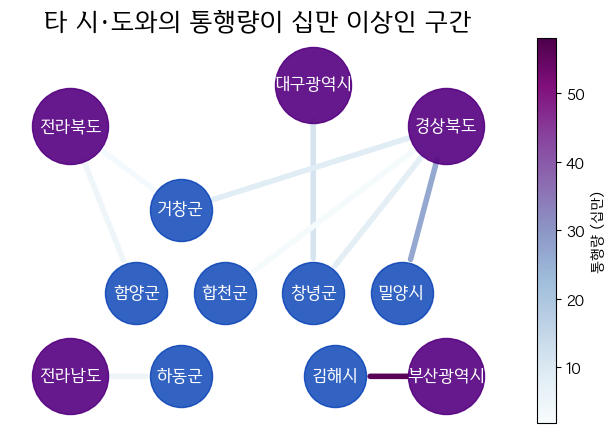

In [148]:
fig, ax = plt.subplots(1,1, figsize=(8,5))
G = nx.Graph()
mpl.rcParams["font.family"] = 'Binggrae?'
cmap = plt.cm.BuPu
G.add_nodes_from(nodeList)
# pos = nx.circular_layout(G)
# pos = {'합천군':(300,520),'함양군':(150,520),'산청군':(225,425),'거창군':(225,600),'창녕군':(450,520),'하동군':(180,300)
#       ,'고성군':(350,200),'통영시':(400,100),'사천시':(250,200),'진주시':(300,300),'밀양시':(600,500),'창원시':(490,300)
#       ,'함안군':(400,350),'양산시':(700,450),'김해시':(600,350)}
pos = {'거창군':(200,500), '경상북도':(800,550), '김해시':(550,400), '대구광역시':(500,575), '밀양시':(700,450), '부산광역시':(800,400),
       '전라남도':(-50,400), '전라북도':(-50,550), '창녕군':(500,450), '하동군':(200,400), '함양군':(100,450), '합천군':(300,450)}
nodes = nx.draw_networkx_nodes(G, pos, nodelist=gyeong, node_size=2000, node_color='#003CB3', alpha=0.8)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=others, node_size=3000, node_color='#550080', alpha=0.9)
nx.draw_networkx_labels(G,pos,labels={i:i for i in nodeList},font_family='Binggrae?',font_color='white')
edges = nx.draw_networkx_edges(
    G,
    pos,
    edgelist=edgeList,
    arrows=True,
    arrowstyle="-",
    connectionstyle='arc3', # rad=0.1
    arrowsize=20,
    width=4,
    # edge_color=list(edge_colors),
    edge_color=hdf['traffic'].values/100000,
    edge_vmin=1,
    edge_vmax=60,
    edge_cmap=cmap,
    min_target_margin=25,
    min_source_margin=25
)

pc = mpl.collections.PatchCollection(edges, cmap=cmap)
pc.set_array(hdf['traffic'].values/100000)

ax = plt.gca()
ax.set_axis_off()
# norm = mpl.colors.Normalize(vmin=5, vmax=80)
# fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmapTraffic),
#              ax=ax, orientation='vertical', label='하루 평균 교통량 (천)', fraction=0.07, pad=0.05, location='left')
plt.colorbar(pc, ax=ax, label='통행량 (십만)')
plt.title('타 시·도와의 통행량이 십만 이상인 구간', fontsize=18)
plt.margins(0.1,0.1)
plt.show()

In [49]:
gyeong = ['거창군',  '김해시', '밀양시', '창녕군', '하동군', '함양군', '합천군']
others = ['경상북도','대구광역시','부산광역시', '전라남도', '전라북도']

In [134]:
fig.savefig('경남타시도와의통행량이십만이상인구간.png')

In [118]:
# series plot for routes towards Busan
compTraffc = pd.Series([5803915,42861,15449], index=['김해시','양산시','창원시'])

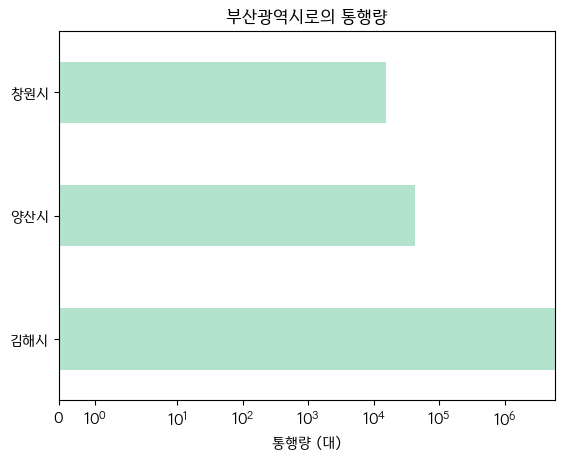

In [119]:
compTraffc.plot(kind='barh', title='부산광역시로의 통행량', colormap=plt.cm.Pastel2, logx='sym', xlabel='통행량 (대)')
plt.margins(0,0.2)
plt.show()

In [120]:
# series plot for routes towards Ulsan
compTraffc = pd.Series([13928,7171], index=['양산시','밀양시'])

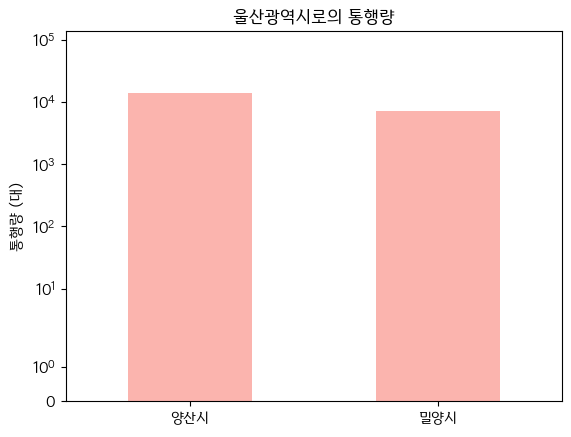

In [121]:
compTraffc.plot(kind='bar', title='울산광역시로의 통행량', colormap=plt.cm.Pastel1, logy='sym', ylabel='통행량 (대)', rot=0)
plt.margins(0,0.2)
plt.show()

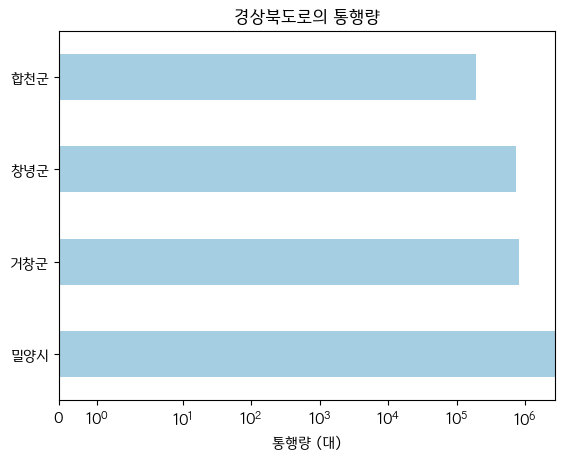

In [123]:
# series plot for routes towards GyeongBuk
compTraffc = pd.Series([2701396,812140,724874,188473], index=['밀양시','거창군','창녕군','합천군'])
compTraffc.plot(kind='barh', title='경상북도로의 통행량', colormap=plt.cm.Paired, logx='sym', xlabel='통행량 (대)', rot=0)
plt.margins(0,0.2)
plt.show()

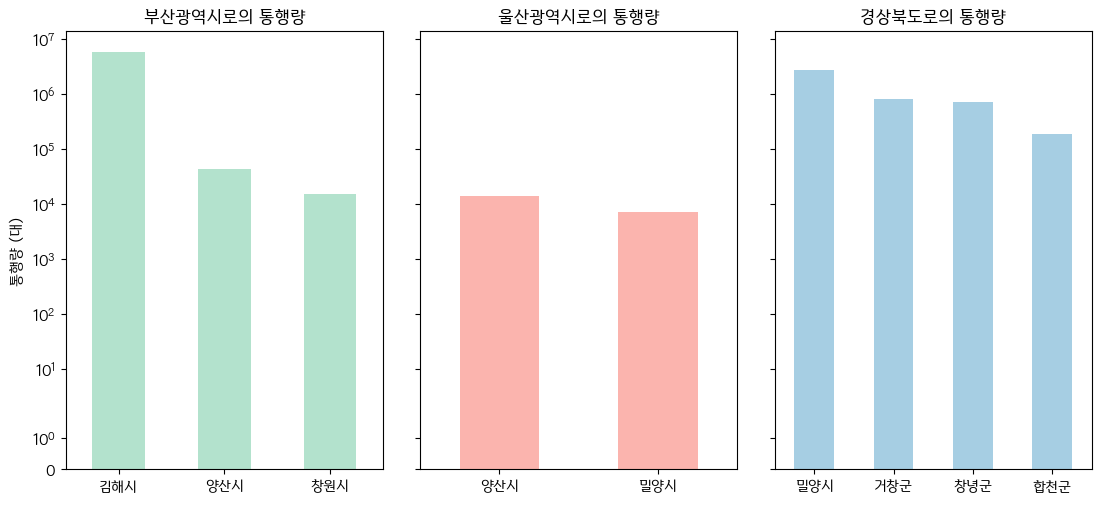

In [164]:
# all at once?
compTraffc1 = pd.Series([5803915,42861,15449], index=['김해시','양산시','창원시'])
compTraffc2 = pd.Series([13928,7171], index=['양산시','밀양시'])
compTraffc3 = pd.Series([2701396,812140,724874,188473], index=['밀양시','거창군','창녕군','합천군'])

fig, axs = plt.subplots(1,3, sharey=True, figsize=(11,5))
fig.tight_layout()
compTraffc1.plot(kind='bar', title='부산광역시와의 통행량', colormap=plt.cm.Pastel2, logy='sym', ylabel='통행량 (대)',rot=0, ax=axs[0])
compTraffc2.plot(kind='bar', title='울산광역시와의 통행량', colormap=plt.cm.Pastel1, logy='sym', ylabel='통행량 (대)', rot=0, ax=axs[1])
compTraffc3.plot(kind='bar', title='경상북도와의 통행량', colormap=plt.cm.Paired, logy='sym', ylabel='통행량 (대)', rot=0, ax=axs[2])
plt.margins(0.1,0.1)
plt.show()

In [165]:
fig.savefig('타시도로의통행량.png')